In [1]:
#After googling, this seems like a more practical approach
#for implementation of k++means

In [2]:
#k++ means is an extension which affects the process of choosing initial
#means
#3 steps:
#1) Pick an initial center randomly
#2) Now calculate D(x)^2 for every other point from nearest center
#3) Pick new center according to weighted probability distribution weights are given by D(x)^2
#4) Repeat 2 and 3 until we have k-means

# Then proceed with normal k-means
# Steps for kmeans
# 1) Calculate D(x) from nearest mean, assign x to cluster denoted by the nearest mean
# 2) Update mean of a cluster by taking the centroid of every element in a cluster
# 3) Repeat 2 and 3 until we achieve a state where the update doesn't change cluster members


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns   
import math
import time
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [4]:
def centroid(means):
    return means.sum() / means.count()

In [5]:
means = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})

In [6]:
means.iloc[1]['c'] = 1

In [7]:
means

,a,b,c
0,1,4,7
1,2,5,1
2,3,6,9


In [8]:
means.idxmin(axis=1)

0    a
1    c
2    a
dtype: object

In [9]:
means['msn'] = means[['a', 'b', 'c']].idxmin(axis=1)
means

,a,b,c,msn
0,1,4,7,a
1,2,5,1,c
2,3,6,9,a


In [10]:
means.groupby(['msn']).count()

,a,b,c
msn,,,
a,2,2,2
c,1,1,1


In [12]:
# means.drop(['msn'], inplace=True, axis=1)
# means - [1, 2, 3]

In [13]:
infori = pd.read_csv('data/housing.csv')
infori.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
infori.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
def normalise(data, ignore = []):
    data_cp = data.copy()
    for col in data_cp.columns:
        if col in ignore:
            continue
        data_cp[col] = (data_cp[col] - data_cp[col].mean()) / data_cp[col].std()
    return data_cp

In [16]:
infori.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7130,5.1515,17.0,5.183839,1.036334,5279.0,2.862798,34.02,-118.11,3.189
17519,2.9853,28.0,3.242857,1.050000,366.0,2.614286,37.33,-121.91,1.875
14474,6.3955,25.0,7.367596,1.047038,1634.0,2.846690,32.85,-117.23,3.167
6430,4.6250,42.0,5.304878,1.036585,546.0,3.329268,34.12,-118.00,1.738
14235,5.0829,5.0,5.972015,0.992537,2061.0,3.845149,32.69,-117.03,1.794


In [17]:
#We may not want to normalise here... as 
# 1) Geographical data, not sure how it plays out (experiment)
# 2) You maybe want to keep some values at their scales, (for ex, money)
# 3) Experiment with both and determine cluster differences 

In [18]:
def calculate_distance_from(data, mean, ans):
    ans[mean.name] = ((data - mean)**2).sum(axis=1)

def calculate_cluster_assignment(data, means):
    distances = pd.DataFrame()
    for mean in means.index:
        calculate_distance_from(data, means.iloc[mean], distances)
        new_clusters = distances.idxmin(axis=1)
        data['cluster'] = new_clusters
        data['mindis'] = distances.min(axis=1)
    return distances

def centroid_calculation(data):
    centroids = data.groupby(['cluster'])
    centroids = centroids.sum() / centroids.count()
    return centroids



In [19]:
#Cell for k++ calc means

#infori.drop(['cluster', 'mindis'], inplace=True, axis=1)

print(infori)

k = 5
all_means = pd.DataFrame()
all_means = pd.concat([all_means, pd.DataFrame(infori.sample())], ignore_index=True)

while(len(all_means.index) < k):
    calculate_cluster_assignment(infori, all_means)
    new_mean = infori.sample(weights='mindis')
    new_mean.drop(['cluster', 'mindis'], inplace=True, axis=1)
    all_means = pd.concat([all_means, pd.DataFrame(new_mean)], ignore_index=True)
    print(len(all_means.index))
    print(infori)
    infori.drop(['cluster', 'mindis'], inplace=True, axis=1)

print(all_means)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [20]:
# Cell for k means calculation

In [21]:
next_means = all_means.copy()
current_means = pd.DataFrame()
while True:
    current_means = next_means.copy()
    calculate_cluster_assignment(infori, current_means)
    next_means = centroid_calculation(infori)
    next_means.drop(['mindis'], inplace=True, axis=1)
    next_means = next_means.reset_index(drop=True)
    if next_means.equals(current_means):
        break

print(next_means)
print(infori)

     MedInc   HouseAge  AveRooms  AveBedrms    Population   AveOccup  \
0  4.346439  13.269531  5.641021   1.074902   7314.082031  11.250094   
1  3.919712  31.638795  5.634530   1.123325    784.565341   2.797294   
2  2.440800  12.500000  5.317508   1.035084  32124.000000   6.089441   
3  3.785324  26.735700  5.183690   1.063193   1698.689555   3.068114   
4  3.844019  20.384216  5.125709   1.070238   3317.143302   3.582070   

    Latitude   Longitude  MedHouseVal  
0  35.168867 -119.030977     2.056391  
1  35.852204 -119.746739     2.112349  
2  34.995000 -119.605000     1.266000  
3  35.426264 -119.422818     2.014709  
4  35.183323 -119.162139     2.018319  
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      

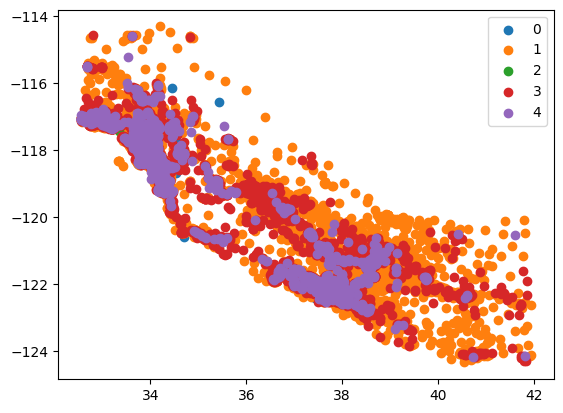

In [22]:

for i in range(k):
    cluster_i = infori[infori['cluster'] == i]
    plt.scatter(cluster_i['Latitude'], cluster_i['Longitude'] , label = i)
plt.legend()
plt.show()

In [23]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(10, 6))
for i in range(k):
    cluster_i = infori[infori['cluster'] == i]
    geometry = [Point(xy) for xy in zip(cluster_i['Longitude'], cluster_i['Latitude'])]
    gdf = GeoDataFrame(cluster_i, geometry=geometry)   
    gdf.plot(ax=ax, marker='o', markersize=15);

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

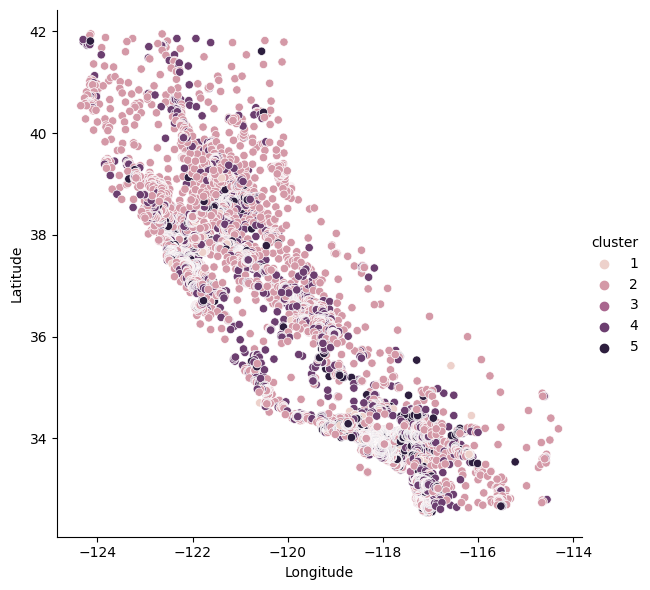

In [26]:
infori['cluster']+=1
sns.relplot(
    x="Longitude", y="Latitude", hue="cluster", data=infori, height=6,
);

In [30]:
infori2 = pd.read_csv('data/housing.csv')
infori2['Lon'] = infori2['Longitude']
infori2['Lat'] = infori2['Latitude']
infori2 = normalise(infori2, ['Lon', 'Lat'])
infori = infori2[infori2.columns[0:8]].copy()

In [31]:
#Cell for k++ calc means

#infori.drop(['cluster', 'mindis'], inplace=True, axis=1)

print(infori)

k = 5
all_means = pd.DataFrame()
all_means = pd.concat([all_means, pd.DataFrame(infori.sample())], ignore_index=True)

while(len(all_means.index) < k):
    calculate_cluster_assignment(infori, all_means)
    new_mean = infori.sample(weights='mindis')
    new_mean.drop(['cluster', 'mindis'], inplace=True, axis=1)
    all_means = pd.concat([all_means, pd.DataFrame(new_mean)], ignore_index=True)
    print(len(all_means.index))
    print(infori)
    infori.drop(['cluster', 'mindis'], inplace=True, axis=1)

print(all_means)

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.344709  0.982119  0.628544  -0.153754   -0.974405 -0.049595   
1      2.332181 -0.607004  0.327033  -0.263329    0.861418 -0.092510   
2      1.782656  1.856137  1.155592  -0.049015   -0.820757 -0.025842   
3      0.932945  1.856137  0.156962  -0.049832   -0.766010 -0.050328   
4     -0.012881  1.856137  0.344702  -0.032905   -0.759828 -0.085614   
...         ...       ...       ...        ...         ...       ...   
20635 -1.216099 -0.289180 -0.155020   0.077352   -0.512579 -0.049109   
20636 -0.691576 -0.845373  0.276874   0.462353   -0.944382  0.005021   
20637 -1.142566 -0.924829 -0.090316   0.049413   -0.369528 -0.071733   
20638 -1.054557 -0.845373 -0.040210   0.158774   -0.604415 -0.091223   
20639 -0.780111 -1.004285 -0.070441   0.138399   -0.033976 -0.043681   

       Latitude  Longitude  
0      1.052523  -1.327803  
1      1.043159  -1.322812  
2      1.038478  -1.332794  
3      1.038478  -1

In [32]:
next_means = all_means.copy()
current_means = pd.DataFrame()
while True:
    current_means = next_means.copy()
    calculate_cluster_assignment(infori, current_means)
    next_means = centroid_calculation(infori)
    next_means.drop(['mindis'], inplace=True, axis=1)
    next_means = next_means.reset_index(drop=True)
    if next_means.equals(current_means):
        break

print(next_means)
print(infori)

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.017714 -0.790381  0.087726  -0.016132   -0.020812 -0.021808  1.079741   
1  2.078284 -0.438198  1.455970   0.704817   -0.259192 -0.014752 -0.438954   
2 -0.231637  0.170607 -0.223798  -0.073833   -0.134811 -0.002455 -0.797329   
3  0.020953 -1.019117 -0.064051  -0.040224    2.731620  0.229895 -0.519629   
4 -0.264545  1.014917 -0.125103  -0.074589   -0.391805 -0.034367  1.063579   

   Longitude  
0  -0.967320  
1   0.438728  
2   0.784179  
3   0.565466  
4  -1.178656  
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.344709  0.982119  0.628544  -0.153754   -0.974405 -0.049595   
1      2.332181 -0.607004  0.327033  -0.263329    0.861418 -0.092510   
2      1.782656  1.856137  1.155592  -0.049015   -0.820757 -0.025842   
3      0.932945  1.856137  0.156962  -0.049832   -0.766010 -0.050328   
4     -0.012881  1.856137  0.344702  -0.032905   -0.759828 -0.085614   
...      

In [33]:
infori2['cluster'] = infori['cluster']

In [34]:
infori2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Lon,Lat,cluster
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595,1.052523,-1.327803,2.129580,-122.23,37.88,4
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510,1.043159,-1.322812,1.314124,-122.22,37.86,0
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842,1.038478,-1.332794,1.258663,-122.24,37.85,4
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328,1.038478,-1.337785,1.165072,-122.25,37.85,4
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614,1.038478,-1.337785,1.172871,-122.25,37.85,4
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.216099,-0.289180,-0.155020,0.077352,-0.512579,-0.049109,1.801603,-0.758808,-1.115777,-121.09,39.48,0
20636,-0.691576,-0.845373,0.276874,0.462353,-0.944382,0.005021,1.806285,-0.818702,-1.124443,-121.21,39.49,0
20637,-1.142566,-0.924829,-0.090316,0.049413,-0.369528,-0.071733,1.778194,-0.823693,-0.992722,-121.22,39.43,0
20638,-1.054557,-0.845373,-0.040210,0.158774,-0.604415,-0.091223,1.778194,-0.873605,-1.058583,-121.32,39.43,0


In [35]:
infori = infori2.copy()

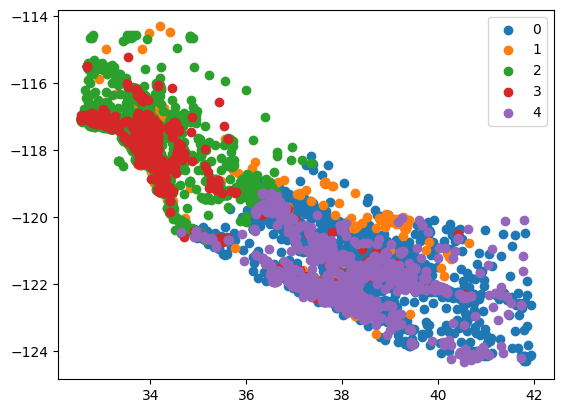

In [36]:
for i in range(k):
    cluster_i = infori[infori['cluster'] == i]
    plt.scatter(cluster_i['Lat'], cluster_i['Lon'] , label = i)
plt.legend()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

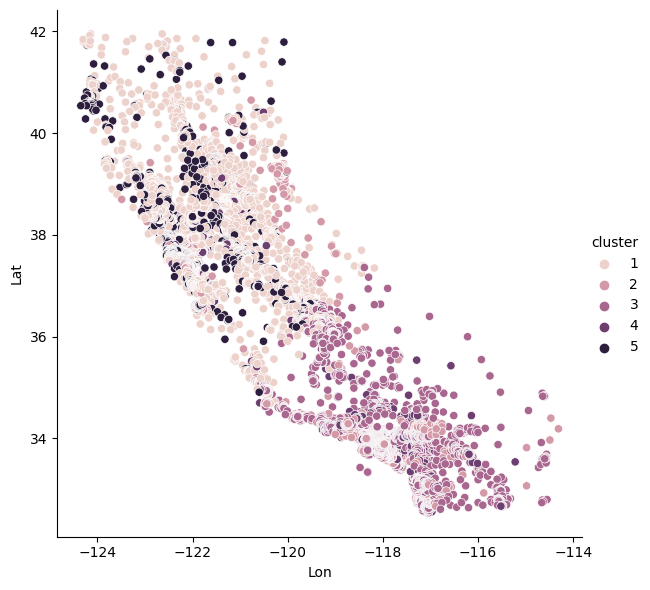

In [37]:
infori['cluster']+=1
sns.relplot(
    x="Lon", y="Lat", hue="cluster", data=infori, height=6,
);

/var/folders/b5/5wttk6911k93lfzfq6j1p1840000gn/T/ipykernel_57868/908133163.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/opt/homebrew/lib/python3.11/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


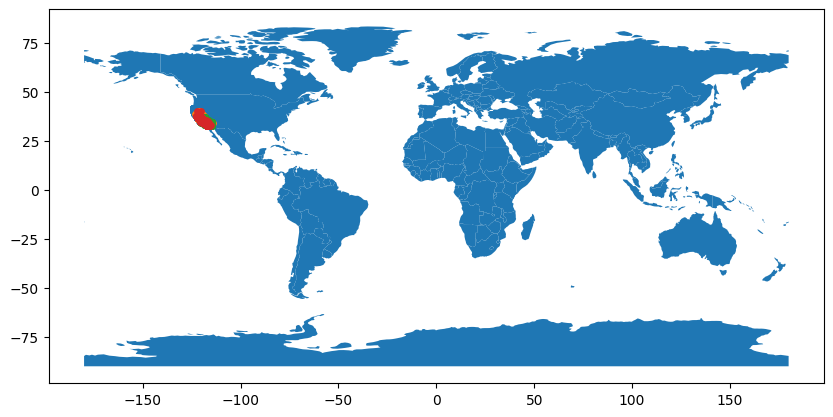

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(10, 6))
for i in range(k):
    cluster_i = infori[infori['cluster'] == i]
    geometry = [Point(xy) for xy in zip(cluster_i['Lon'], cluster_i['Lat'])]
    gdf = GeoDataFrame(cluster_i, geometry=geometry)   
    gdf.plot(ax=ax, marker='o', markersize=15);